In [11]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

sequence_length = 50  # Długość sekwencji
num_samples = 10000    # Liczba próbek

# Generowanie danych
timesteps = np.linspace(0, np.pi, sequence_length)
data = np.sin(timesteps * np.linspace(1, 5, num_samples).reshape(-1, 1))

# Modyfikacja kształtu danych
X = data[:, :-1].reshape(num_samples, -1, 1)  # Reshape do formatu (num_samples, sequence_length-1, 1)
y = data[:, 1:].reshape(num_samples, -1, 1)   # Reshape do formatu (num_samples, sequence_length-1, 1)

# Przygotowanie danych do treningu
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Tworzenie DataLoadera
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)


In [12]:
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x

# Inicjalizacja modelu
model = SimpleRNN(input_size=1, hidden_size=50, output_size=1)


In [13]:
import torch.optim as optim

# Kryterium i optymalizator
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 100

# Pętla treningowa
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)

        # Backward pass i optymalizacja
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.16177105903625488
Epoch 10, Loss: 0.004352498333901167
Epoch 20, Loss: 0.002163568278774619
Epoch 30, Loss: 0.0012627763208001852
Epoch 40, Loss: 0.0004178429953753948
Epoch 50, Loss: 0.00021858973195776343
Epoch 60, Loss: 0.00031182030215859413
Epoch 70, Loss: 0.00024146976647898555
Epoch 80, Loss: 0.00018812883354257792
Epoch 90, Loss: 0.00017135684902314097


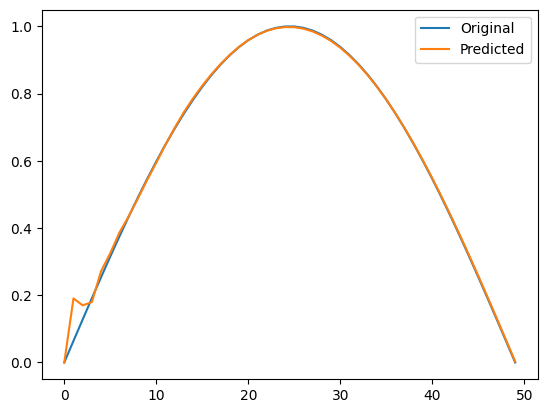

In [14]:
import matplotlib.pyplot as plt

# Testowanie modelu
model.eval()
with torch.no_grad():
    predictions = model(X).numpy()

# Wizualizacja
plt.plot(data[0], label='Original')
plt.plot(np.hstack((data[0, 0], predictions[0, :, 0])), label='Predicted')
plt.legend()
plt.show()
